In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import dynamo as dyn
dyn.__version__

'0.0+07100a0'

In [2]:
# simulate ggplot2 plotting styple with black background

dyn.configuration.set_figure_params('dynamo', background='black')  

In [3]:
adata = dyn.sample_data.BM()


In [4]:
adata.obs['Clusters'] = '1'

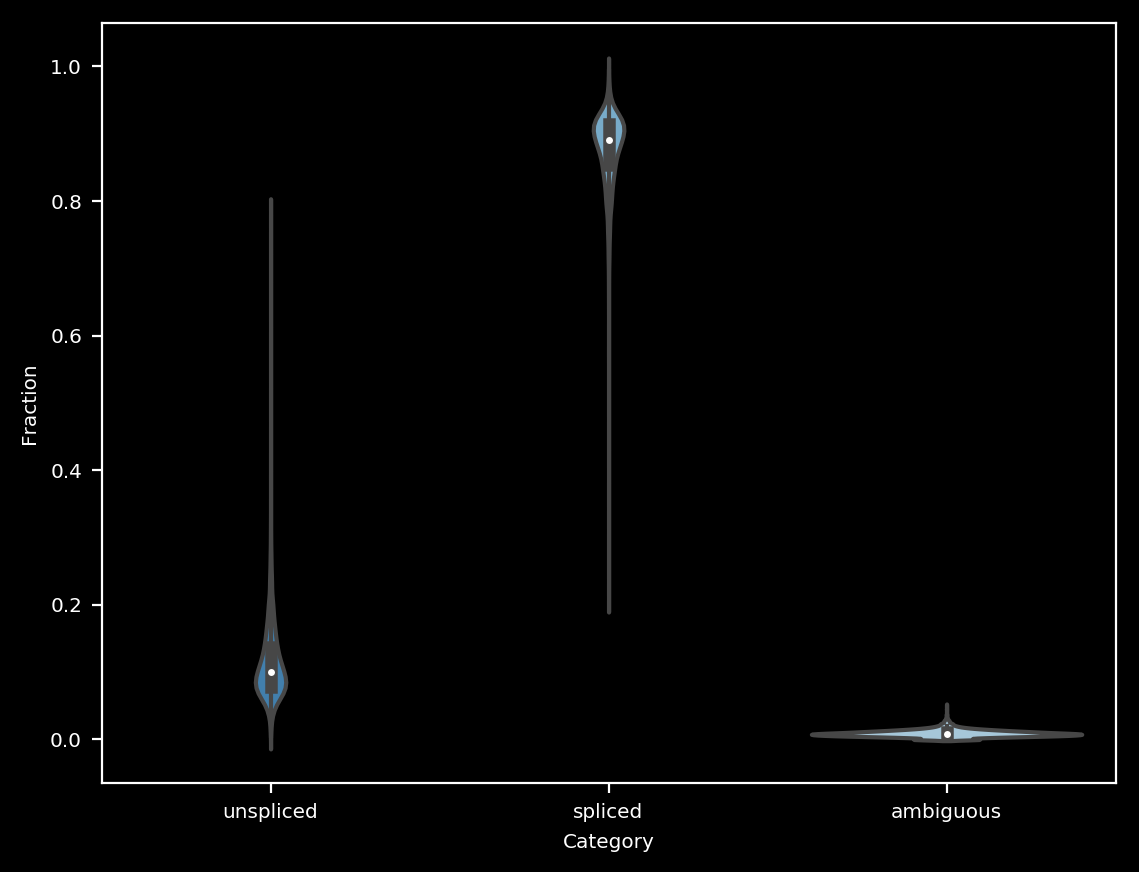

In [5]:
dyn.pl.show_fraction(adata)


In [6]:
dyn.pp.recipe_monocle(adata, n_top_genes=1000)


AnnData object with n_obs × n_vars = 6667 × 24421 
    obs: 'Clusters', 'spliced_Size_Factor', 'unspliced_Size_Factor', 'Size_Factor', 'use_for_dynamo'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_dynamo'
    uns: 'velocyto_SVR', 'pp_log', 'explained_variance_ratio_', 'pca_fit', 'feature_selection'
    obsm: 'X_pca'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced'

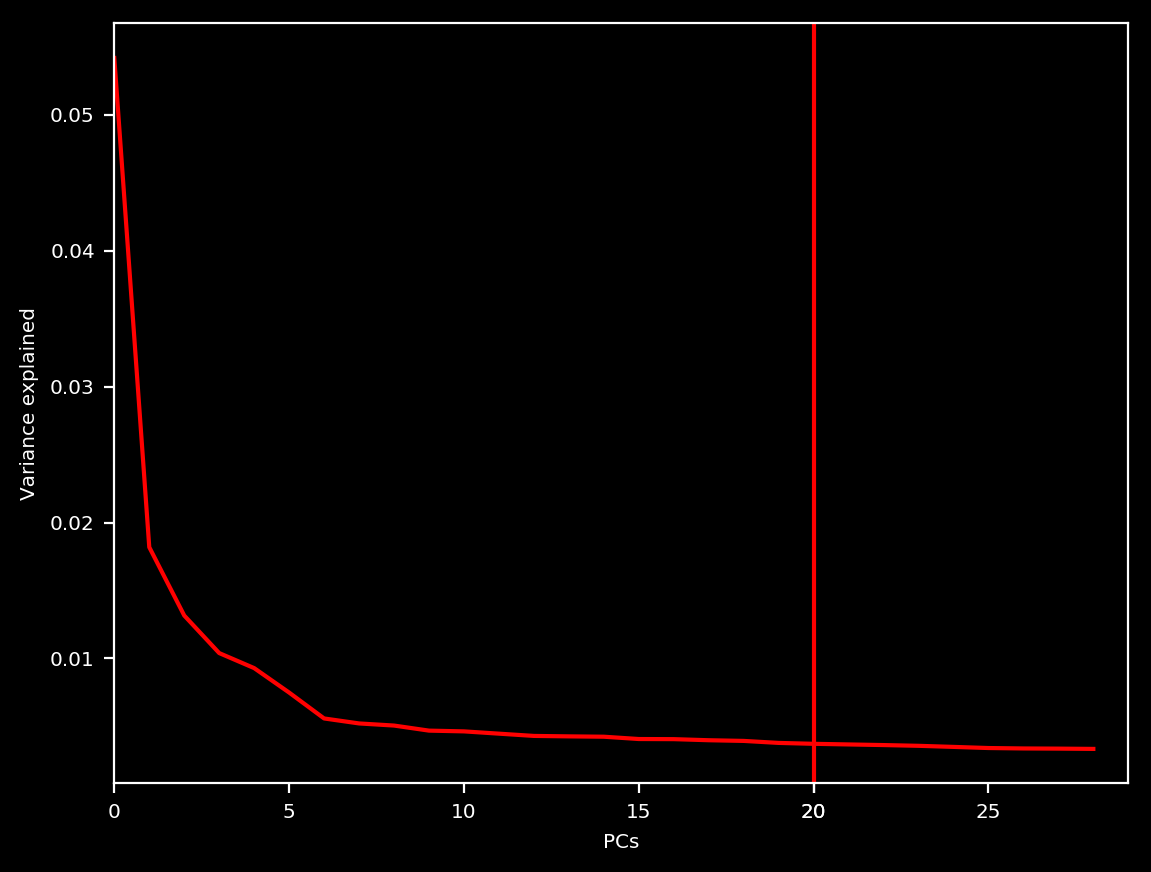

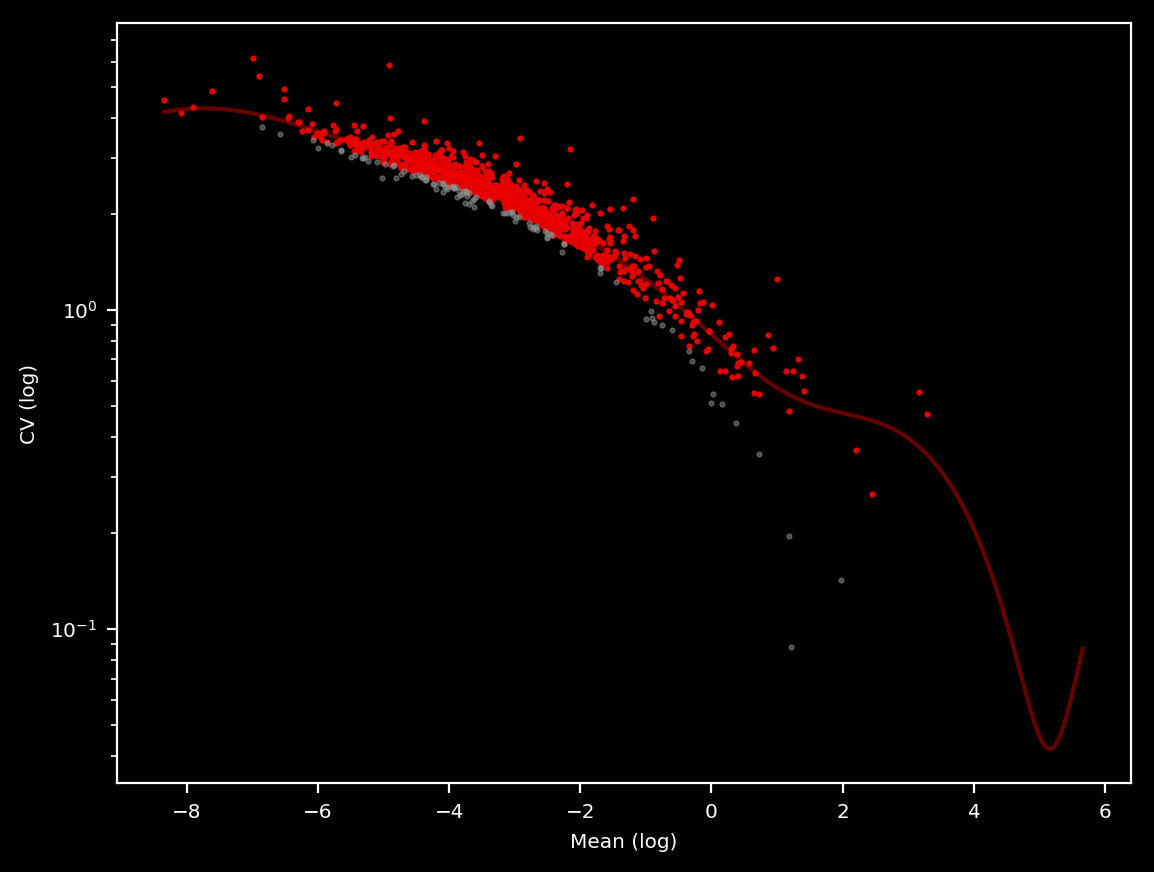

In [7]:
dyn.pl.variance_explained(adata)
dyn.pl.feature_genes(adata)

In [8]:
dyn.tl.dynamics(adata, mode='moment')


/home/xqiu/.local/lib/python3.6/site-packages/dynamo-0.0+07100a0-py3.6.egg/dynamo/tools/dynamics.py:102: UserWarning: dynamo detects the experiment type of your data as conventional, but your input experiment_type is None
  'is {}'.format(exp_type, experiment_type))
/home/xqiu/.local/lib/python3.6/site-packages/scipy/sparse/_index.py:118: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


AnnData object with n_obs × n_vars = 6667 × 24421 
    obs: 'Clusters', 'spliced_Size_Factor', 'unspliced_Size_Factor', 'Size_Factor', 'use_for_dynamo'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_dynamo', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0'
    uns: 'velocyto_SVR', 'pp_log', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics'
    obsm: 'X_pca'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'

In [9]:
dyn.tl.reduceDimension(adata)


AnnData object with n_obs × n_vars = 6667 × 24421 
    obs: 'Clusters', 'spliced_Size_Factor', 'unspliced_Size_Factor', 'Size_Factor', 'use_for_dynamo'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_dynamo', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0'
    uns: 'velocyto_SVR', 'pp_log', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'

In [10]:
dyn.tl.cell_velocities(adata)


AnnData object with n_obs × n_vars = 6667 × 24421 
    obs: 'Clusters', 'spliced_Size_Factor', 'unspliced_Size_Factor', 'Size_Factor', 'use_for_dynamo'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_dynamo', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_velocity'
    uns: 'velocyto_SVR', 'pp_log', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'kmc', 'transition_matrix', 'grid_velocity_umap'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'

In [11]:
gene_list=adata.var.index[adata.var.use_for_velocity].values[:3]

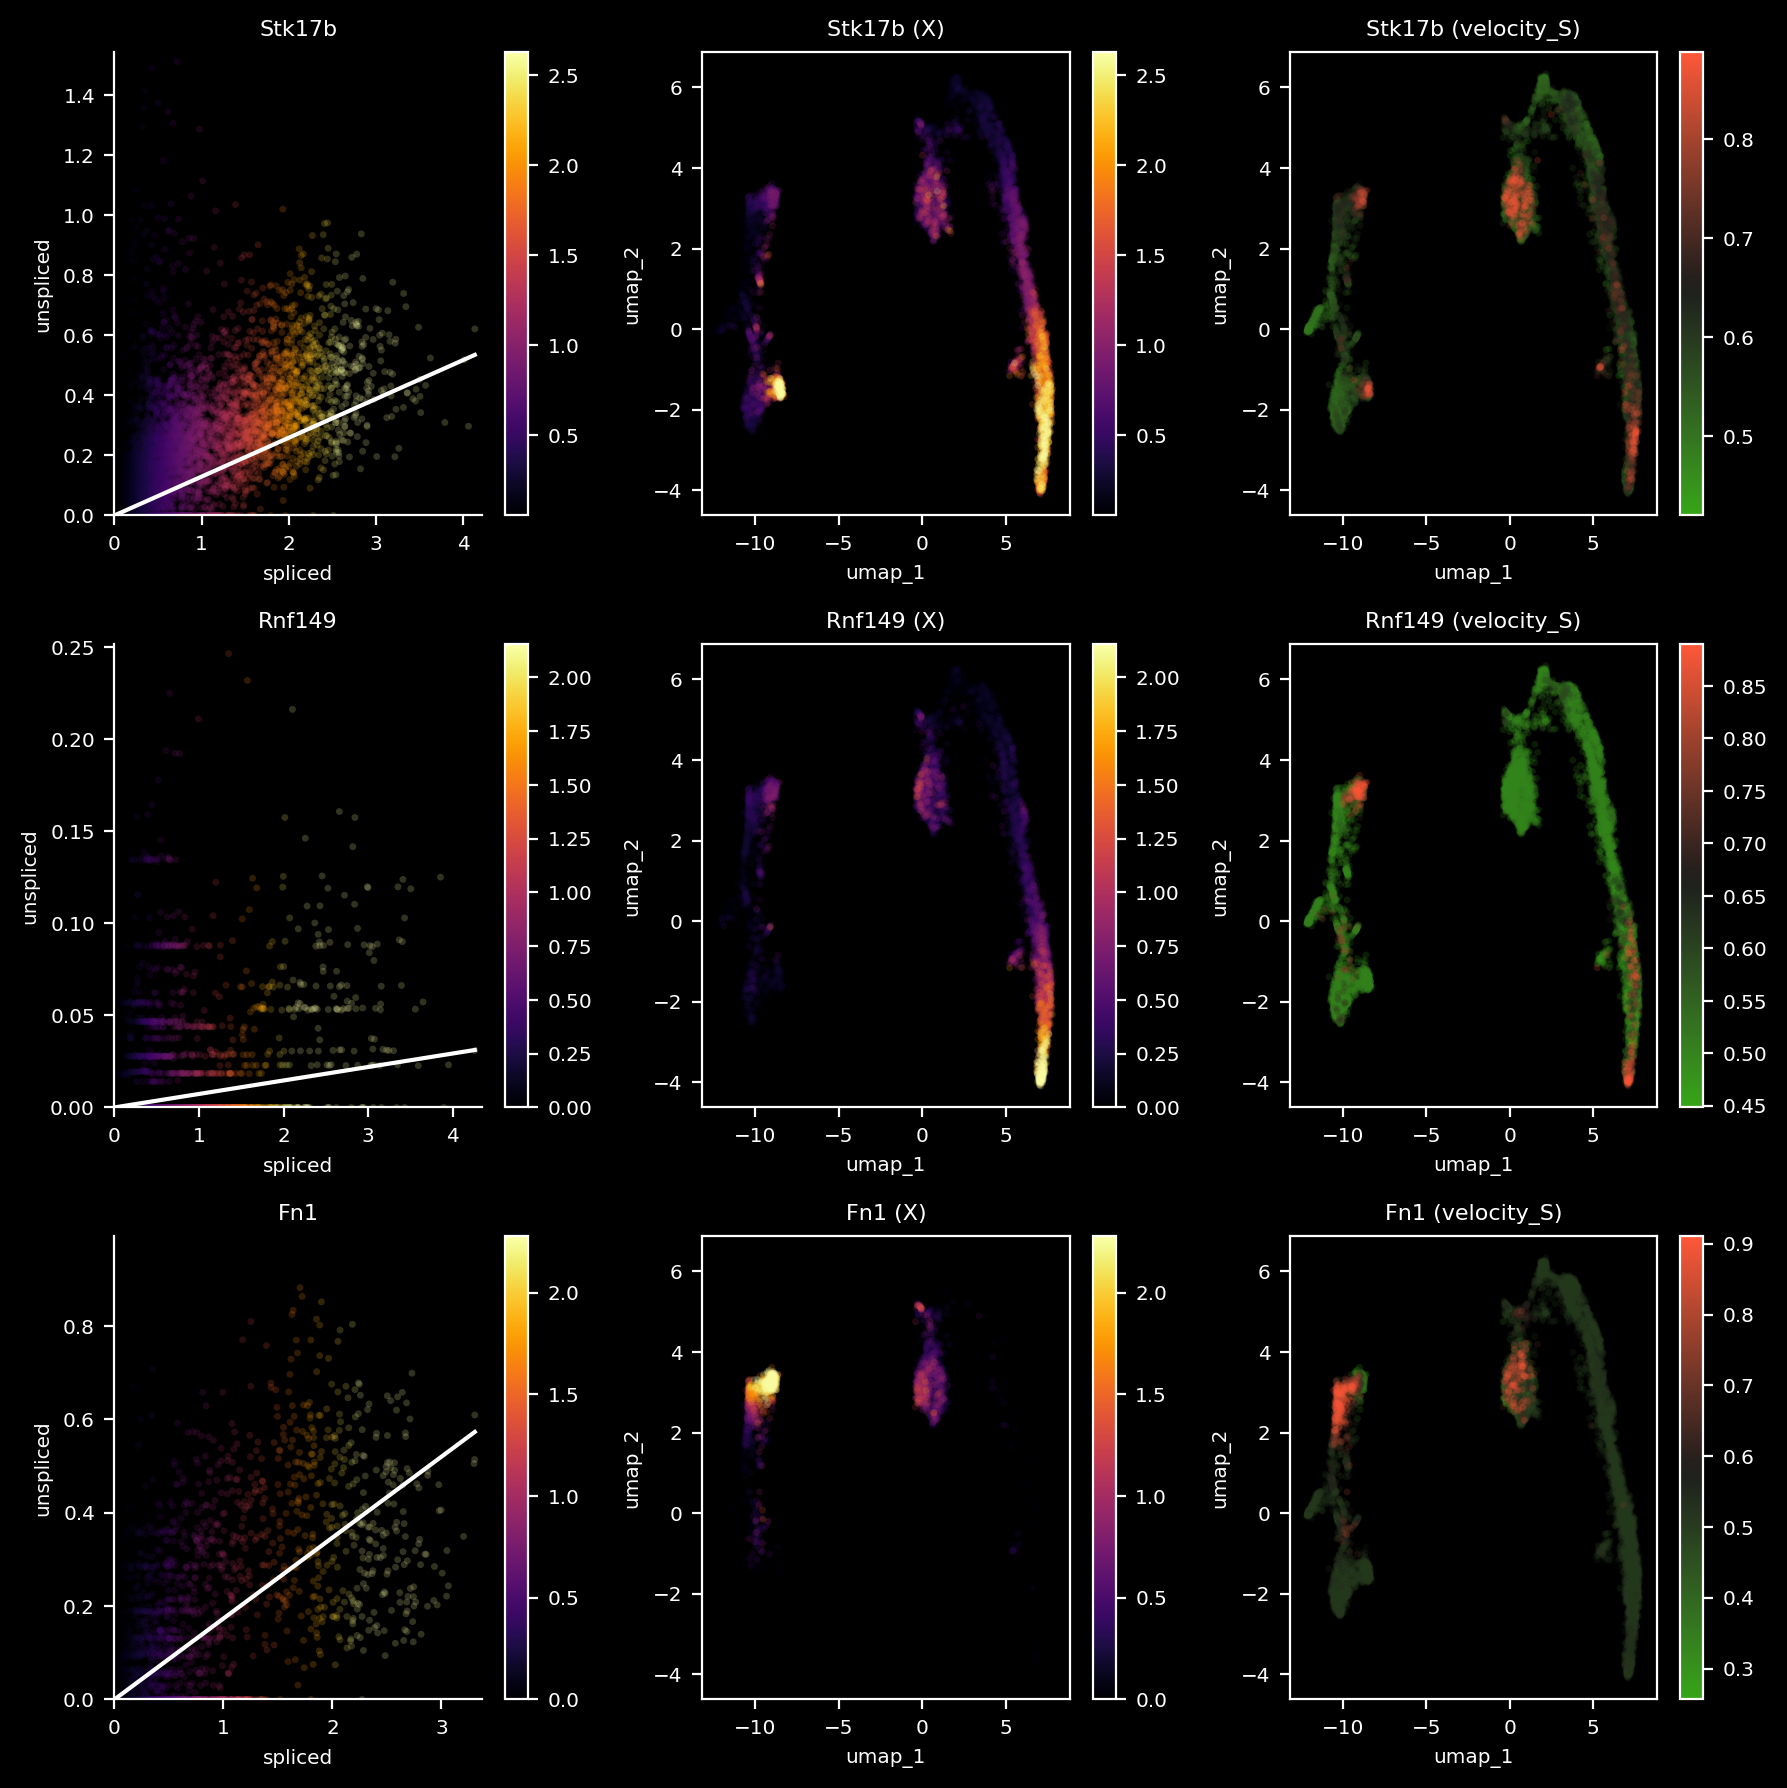

In [12]:
dyn.pl.phase_portraits(adata, genes=gene_list, ncols=3, figsize=(3, 3), basis='umap', show_quiver=False)

/home/xqiu/.local/lib/python3.6/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


<Figure size 650x500 with 0 Axes>

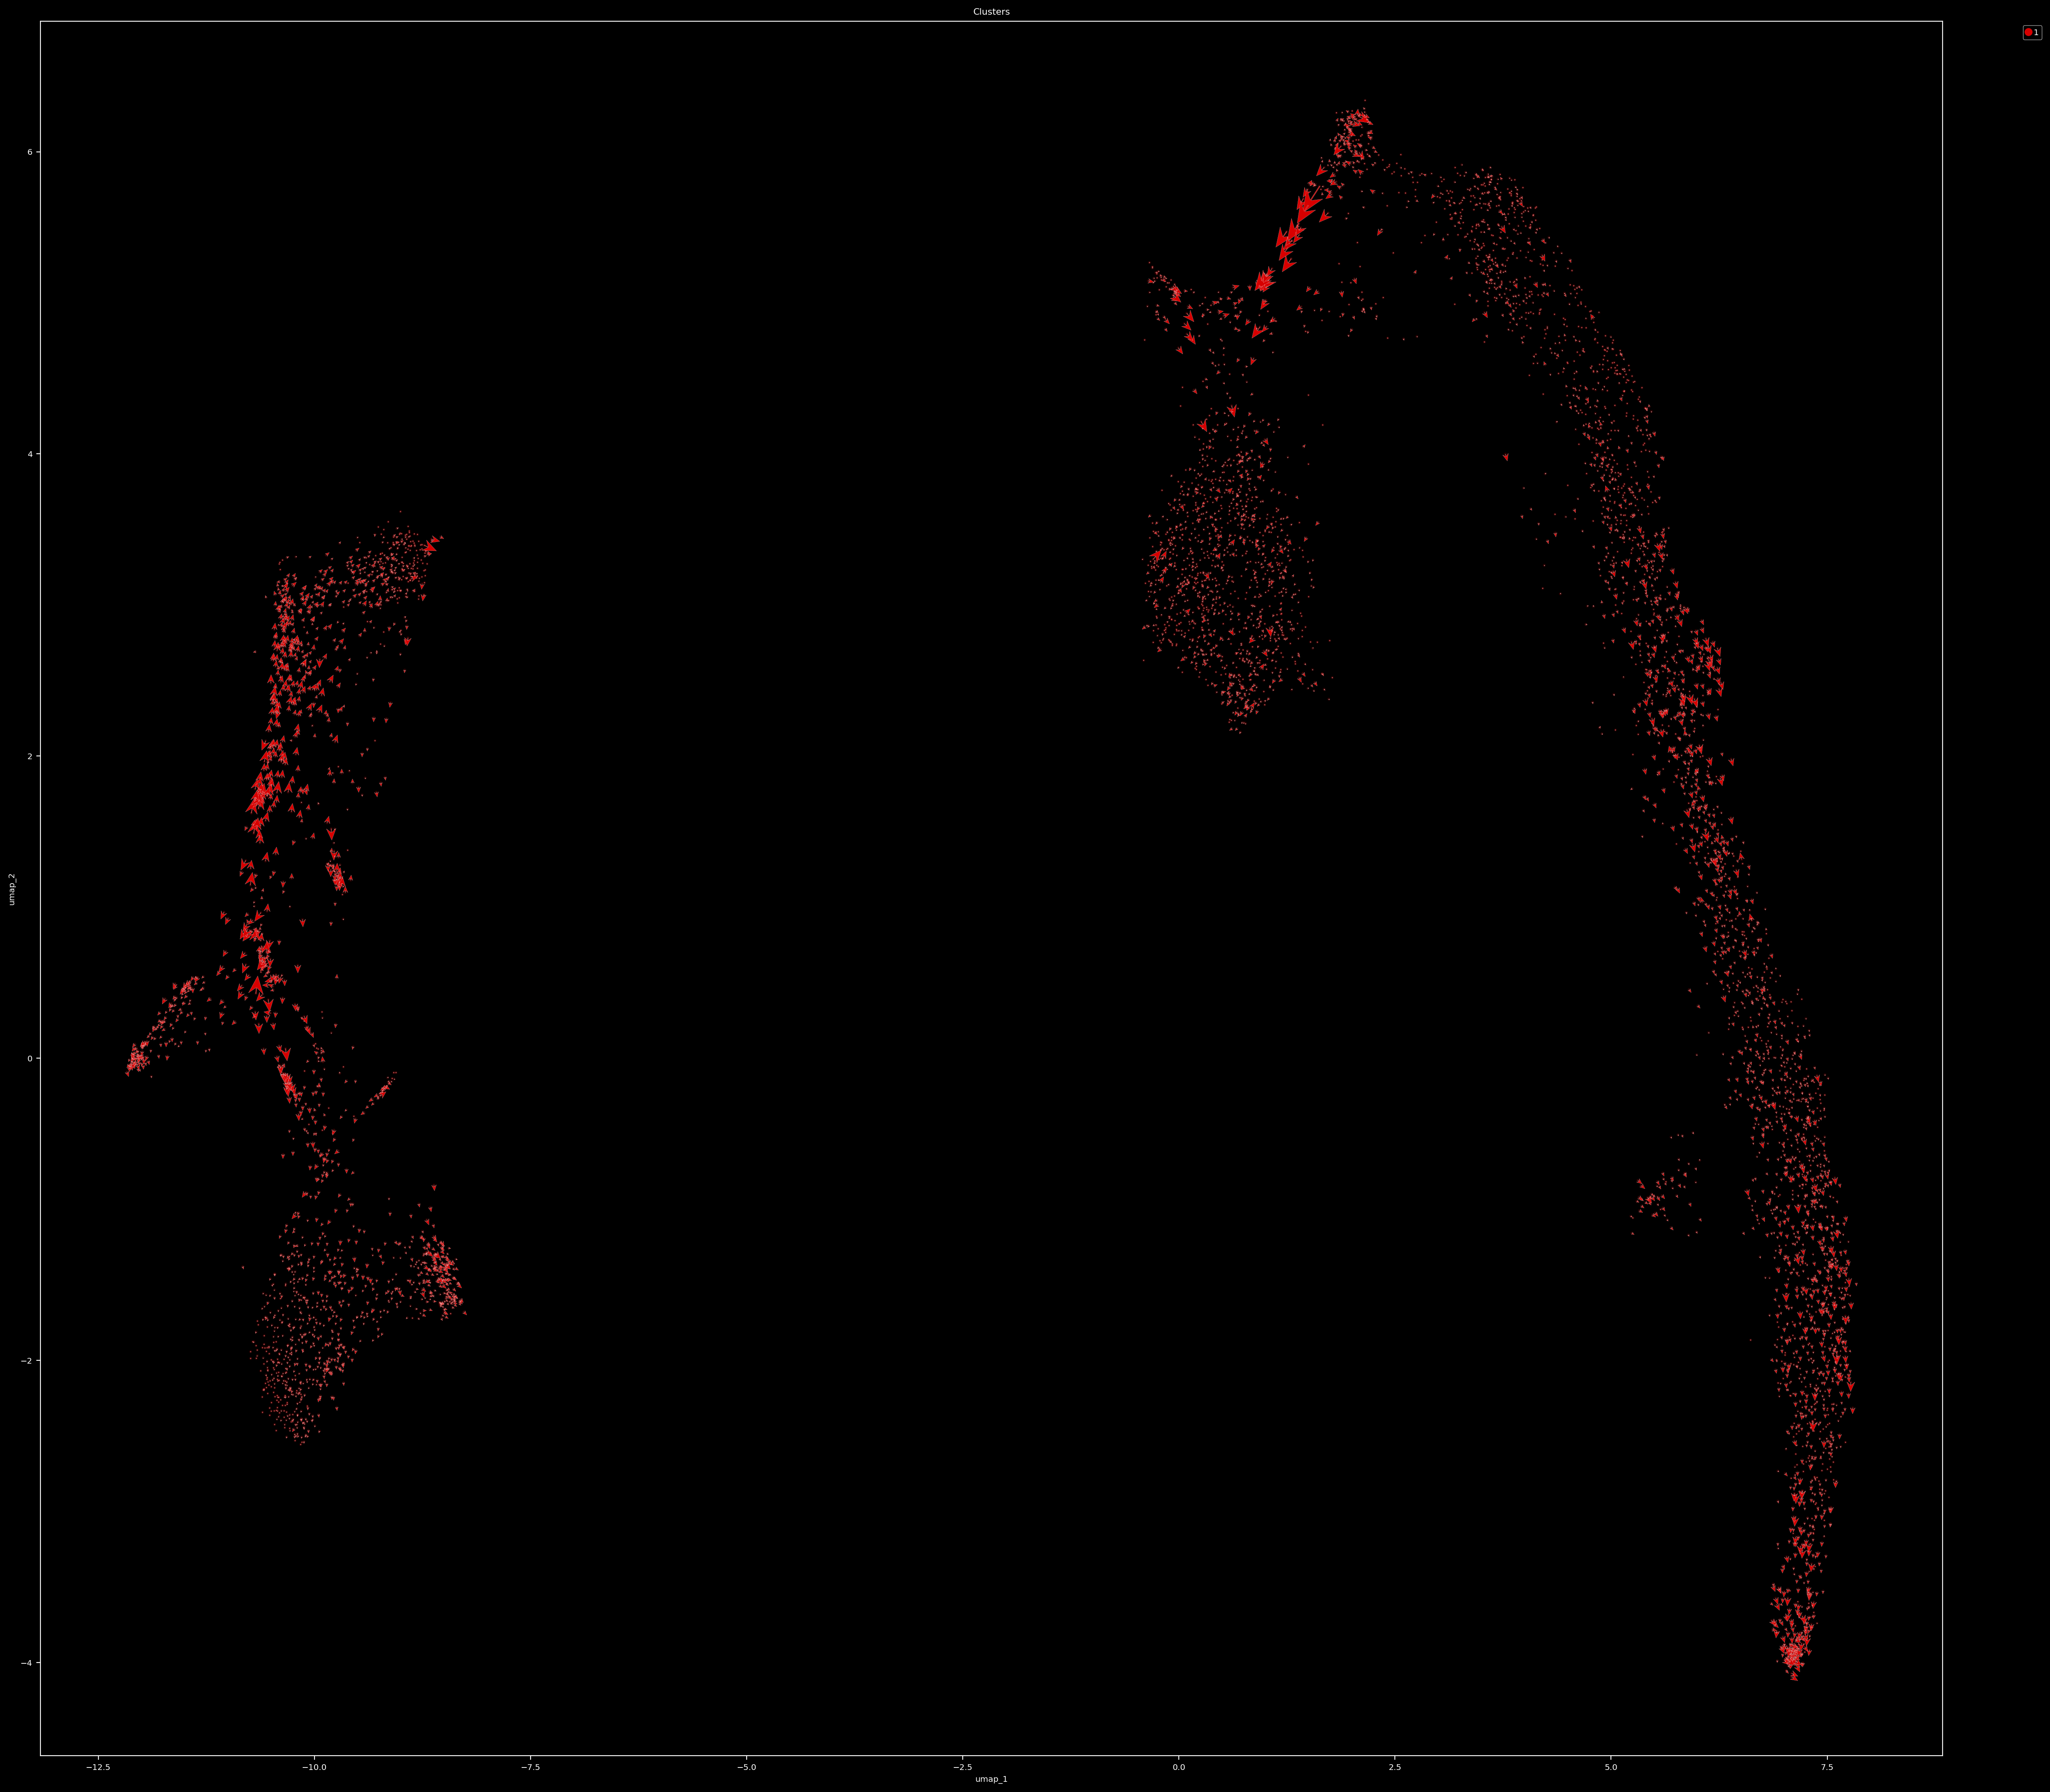

In [13]:
dyn.pl.cell_wise_velocity(adata, color="Clusters", basis='umap', quiver_size=2, quiver_length=1, figsize=(25, 22)) # ['GRIA3', 'LINC00982', 'AFF2']



/home/xqiu/.local/lib/python3.6/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


<Figure size 650x500 with 0 Axes>

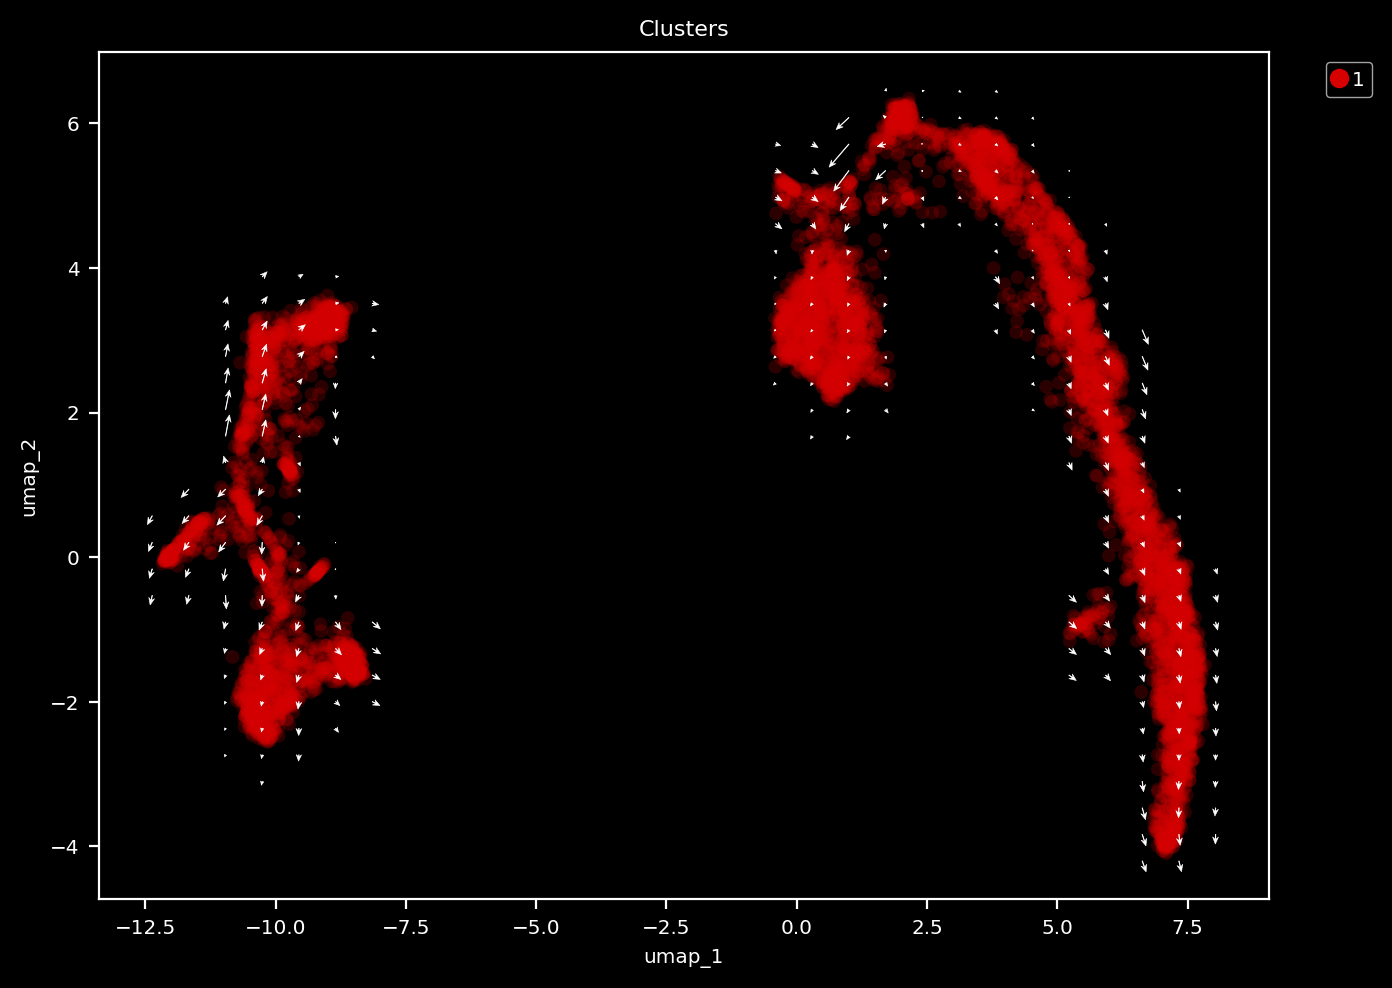

In [14]:
dyn.pl.grid_velocity(adata, color=['Clusters'], basis='umap', method='gaussian')

/home/xqiu/.local/lib/python3.6/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


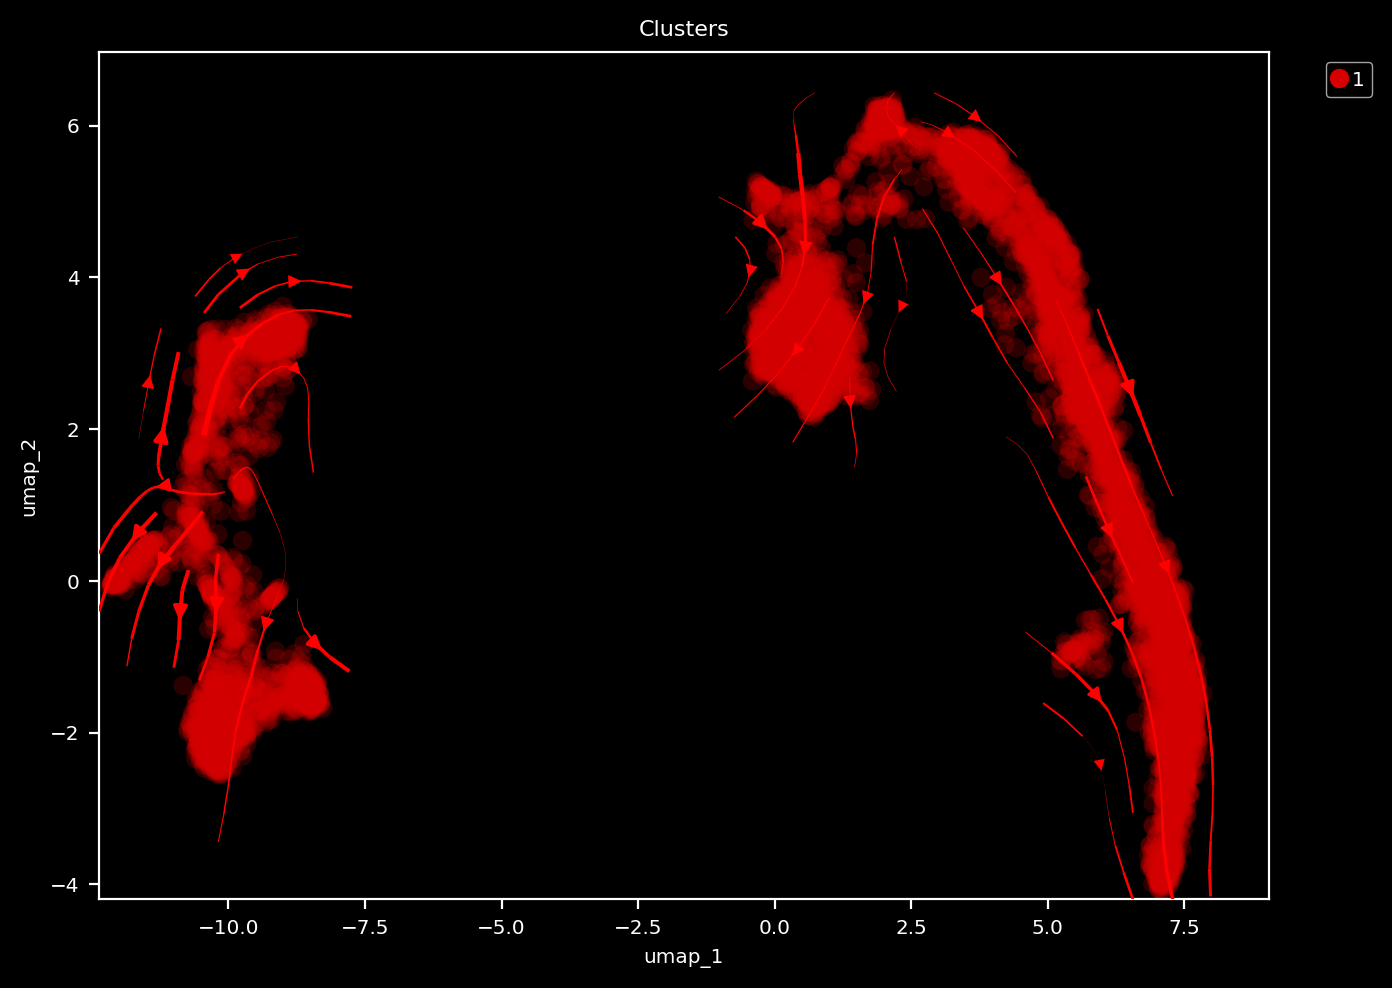

In [15]:

dyn.pl.streamline_plot(adata, color=['Clusters'], basis='umap') 

/home/xqiu/.local/lib/python3.6/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


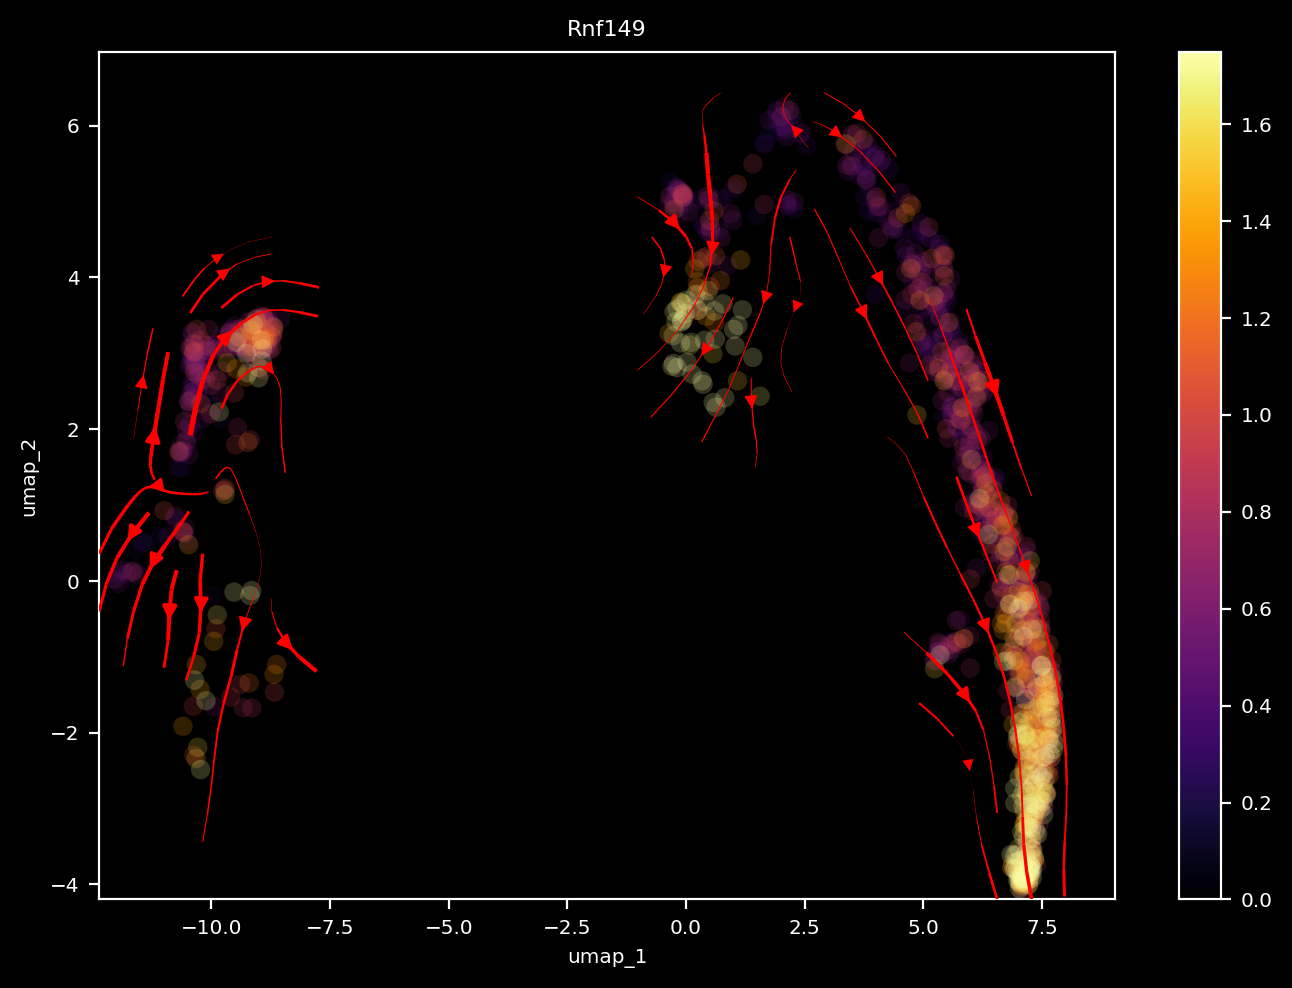

In [16]:
dyn.pl.streamline_plot(adata, color=adata.var.index[adata.var.use_for_velocity][:1], basis='umap', background='black') 

In [17]:
dyn.tl.VectorField(adata, basis='umap', dims=[0, 1])


/home/xqiu/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/xqiu/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


AnnData object with n_obs × n_vars = 6667 × 24421 
    obs: 'Clusters', 'spliced_Size_Factor', 'unspliced_Size_Factor', 'Size_Factor', 'use_for_dynamo'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_dynamo', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_velocity'
    uns: 'velocyto_SVR', 'pp_log', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'kmc', 'transition_matrix', 'grid_velocity_umap', 'VecFld_umap'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'

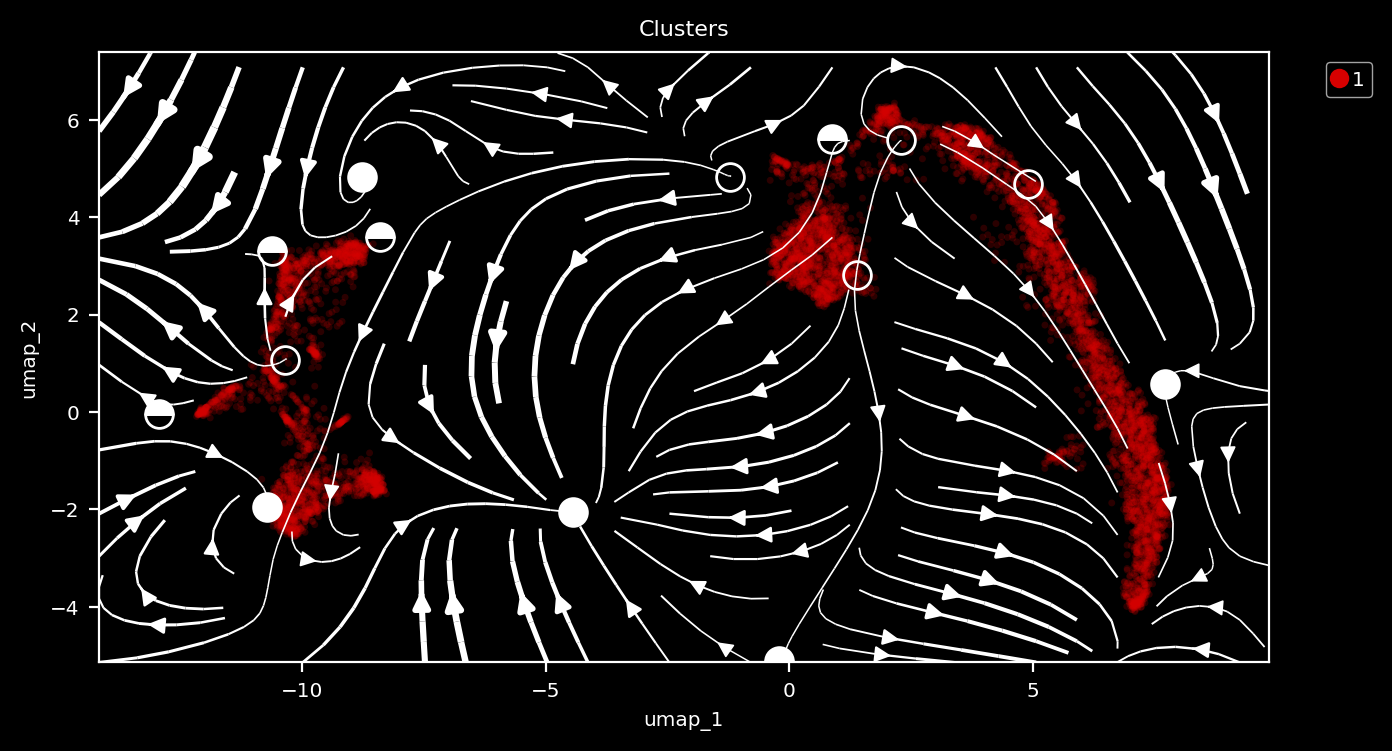

In [18]:
dyn.pl.topography(adata, color=['Clusters'], basis='umap', ncols=1)

In [19]:
dyn.configuration.set_figure_params('dynamo', background='white')  

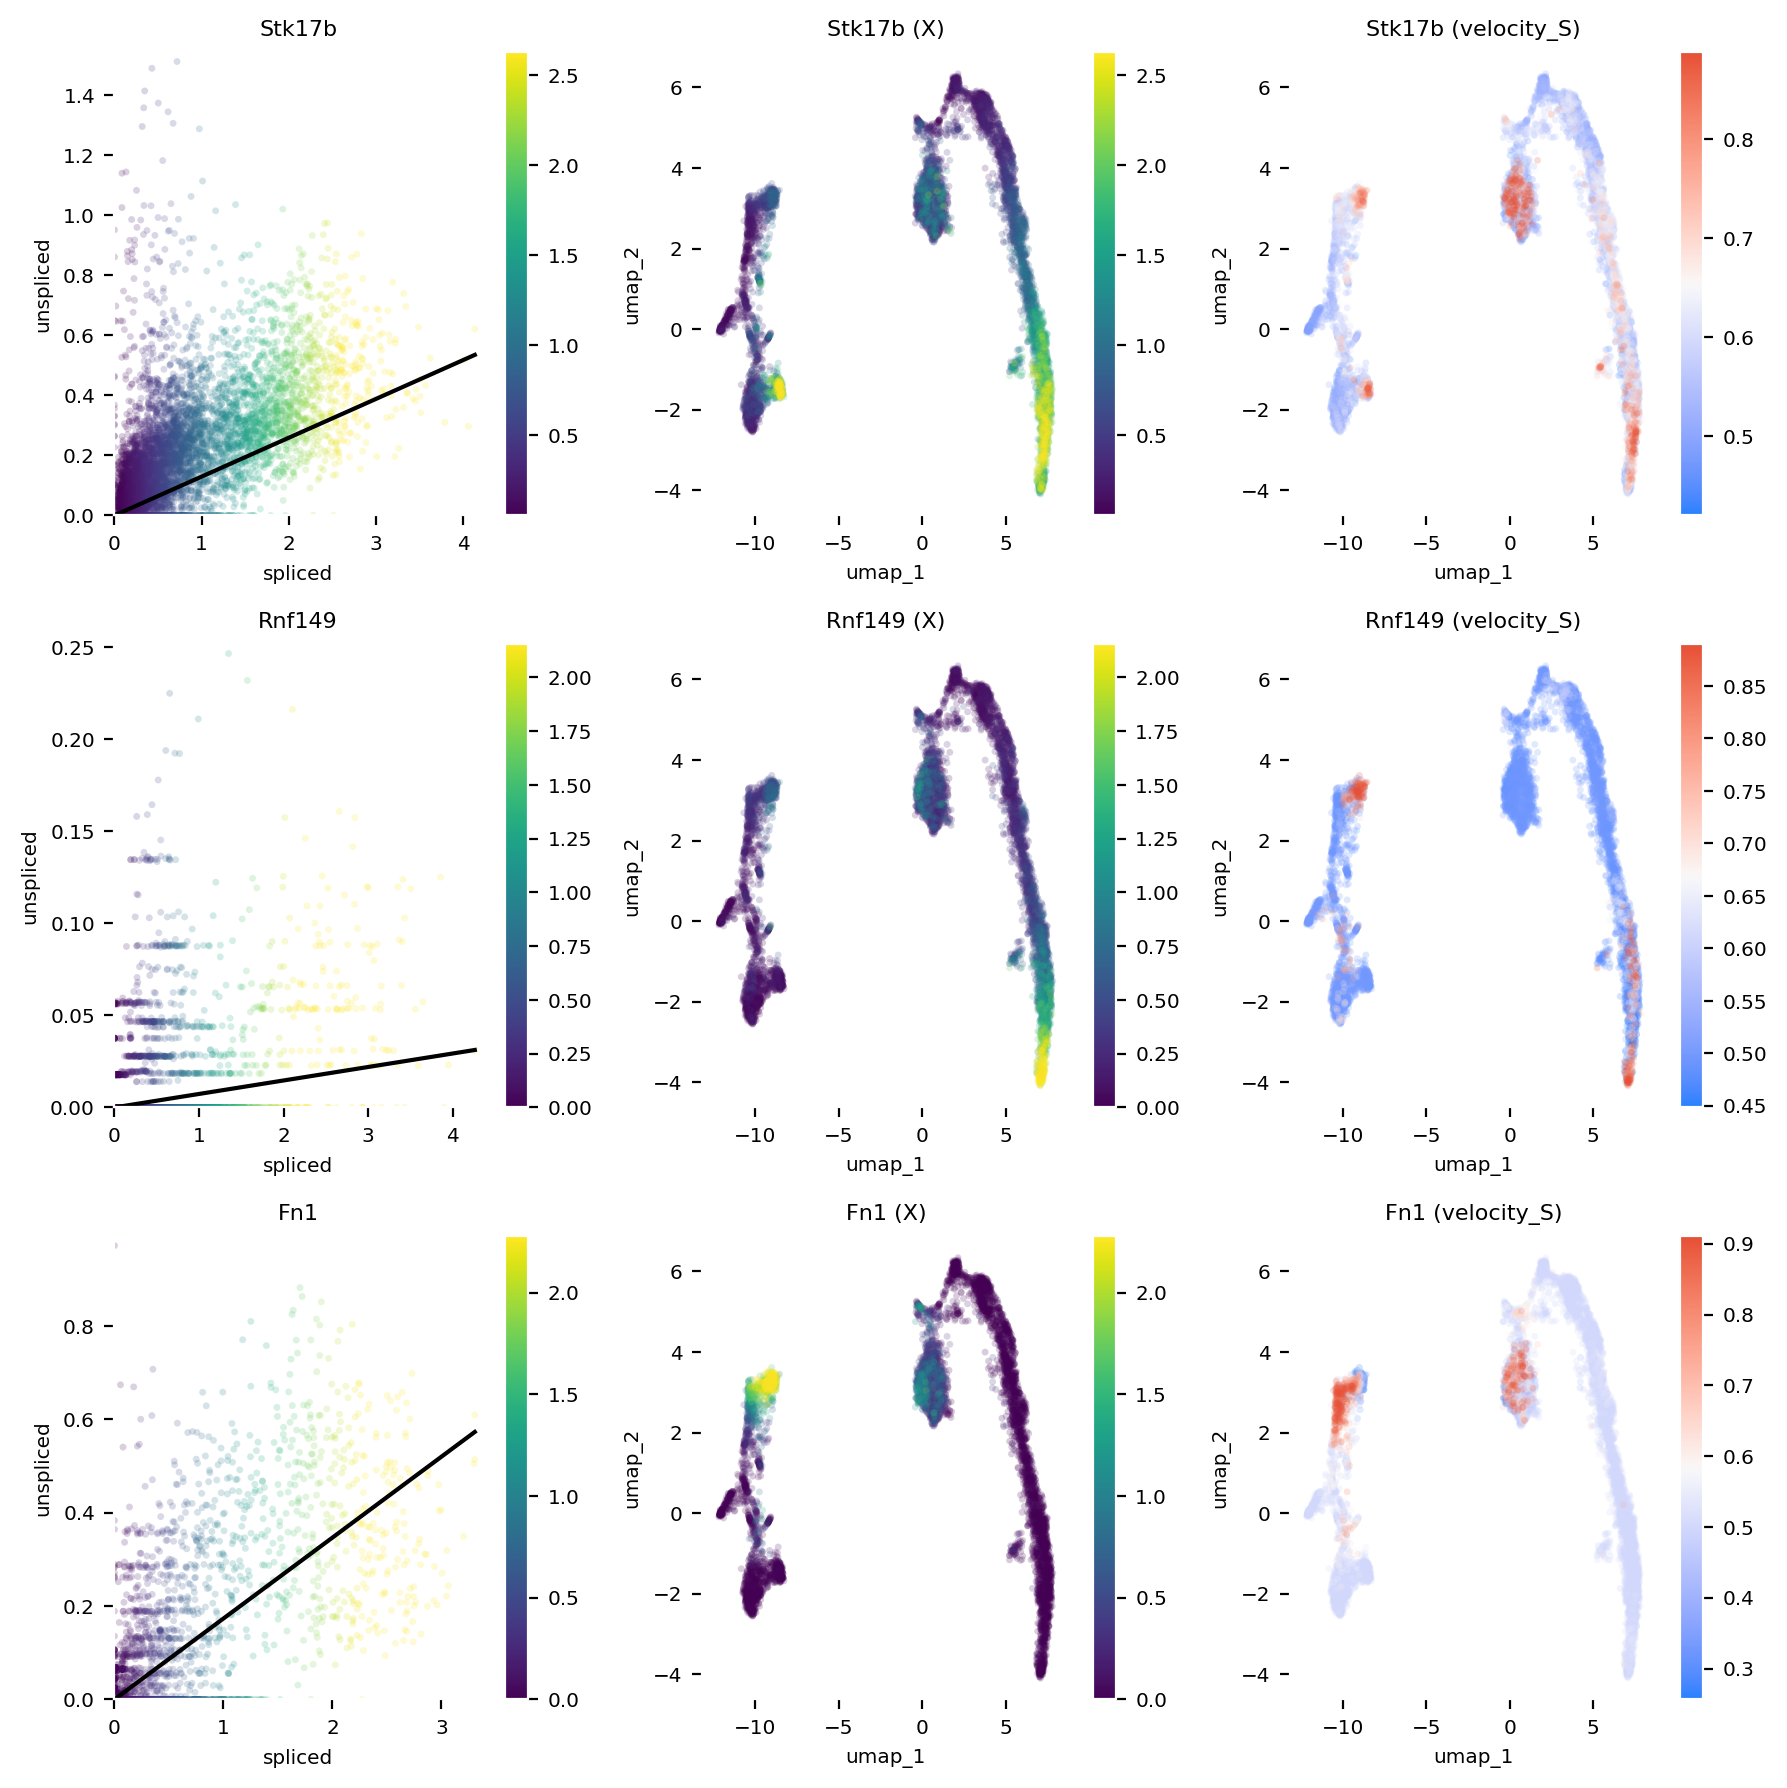

<Figure size 650x500 with 0 Axes>

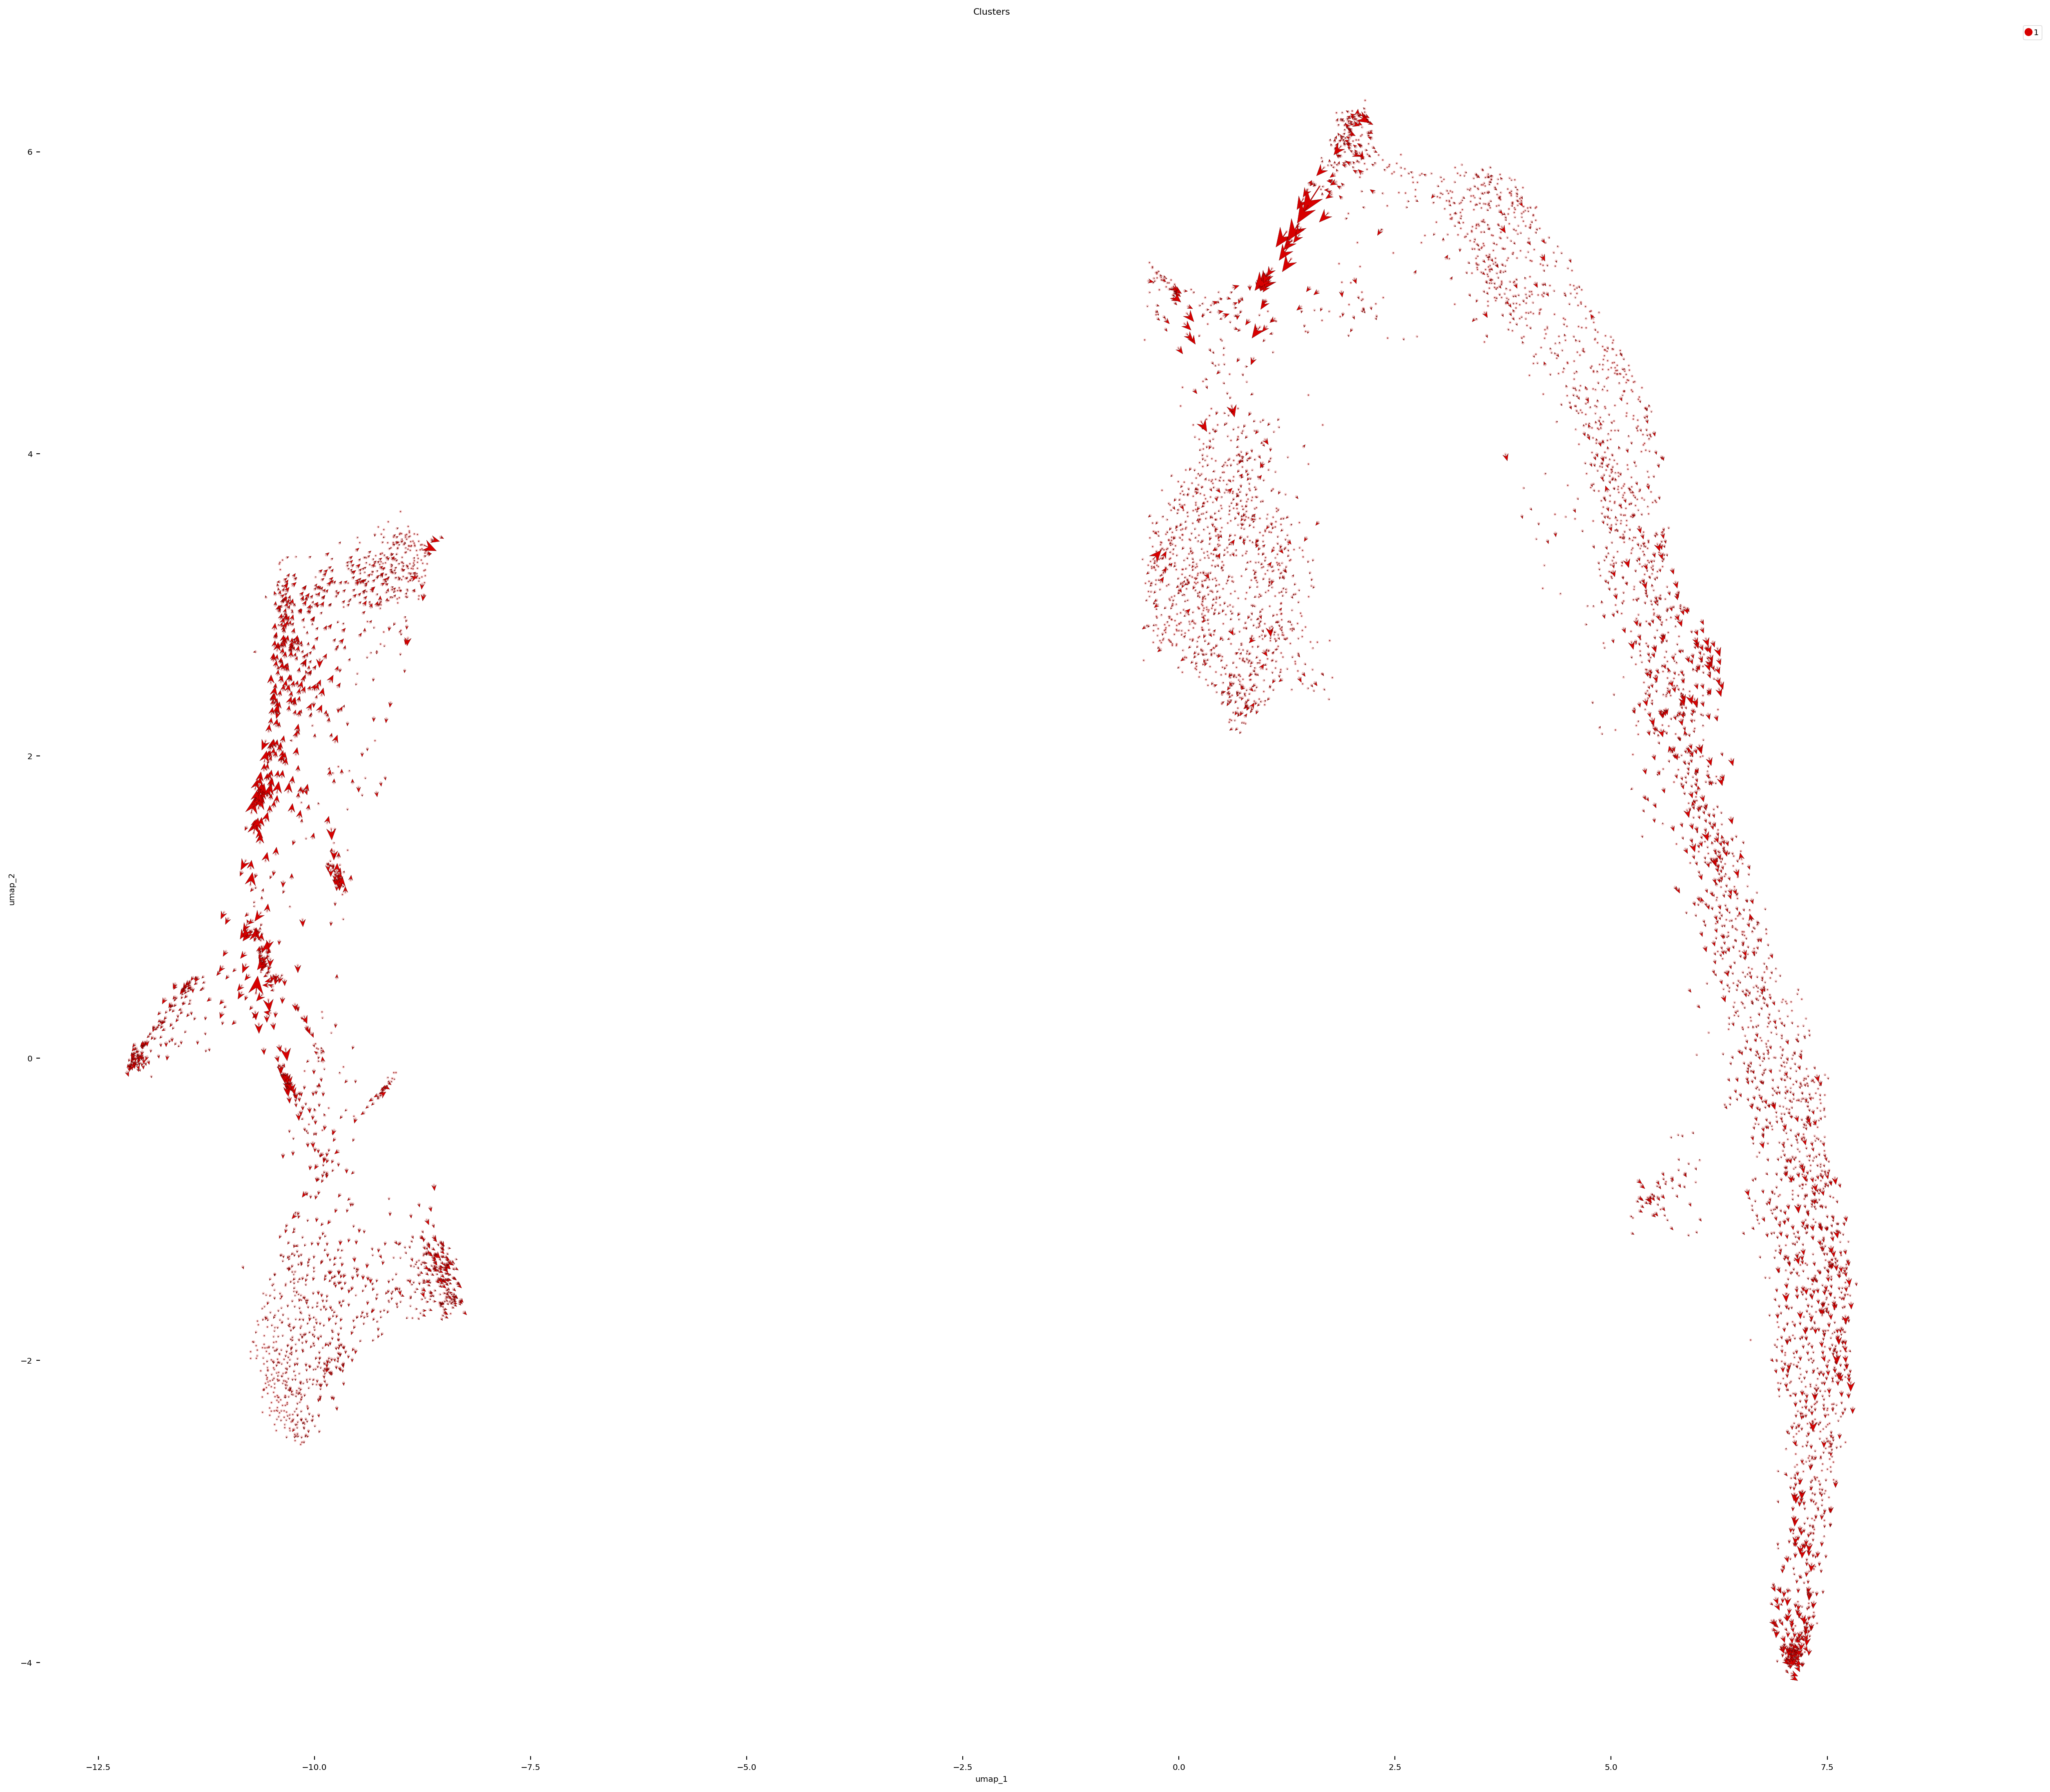

/home/xqiu/.local/lib/python3.6/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


<Figure size 650x500 with 0 Axes>

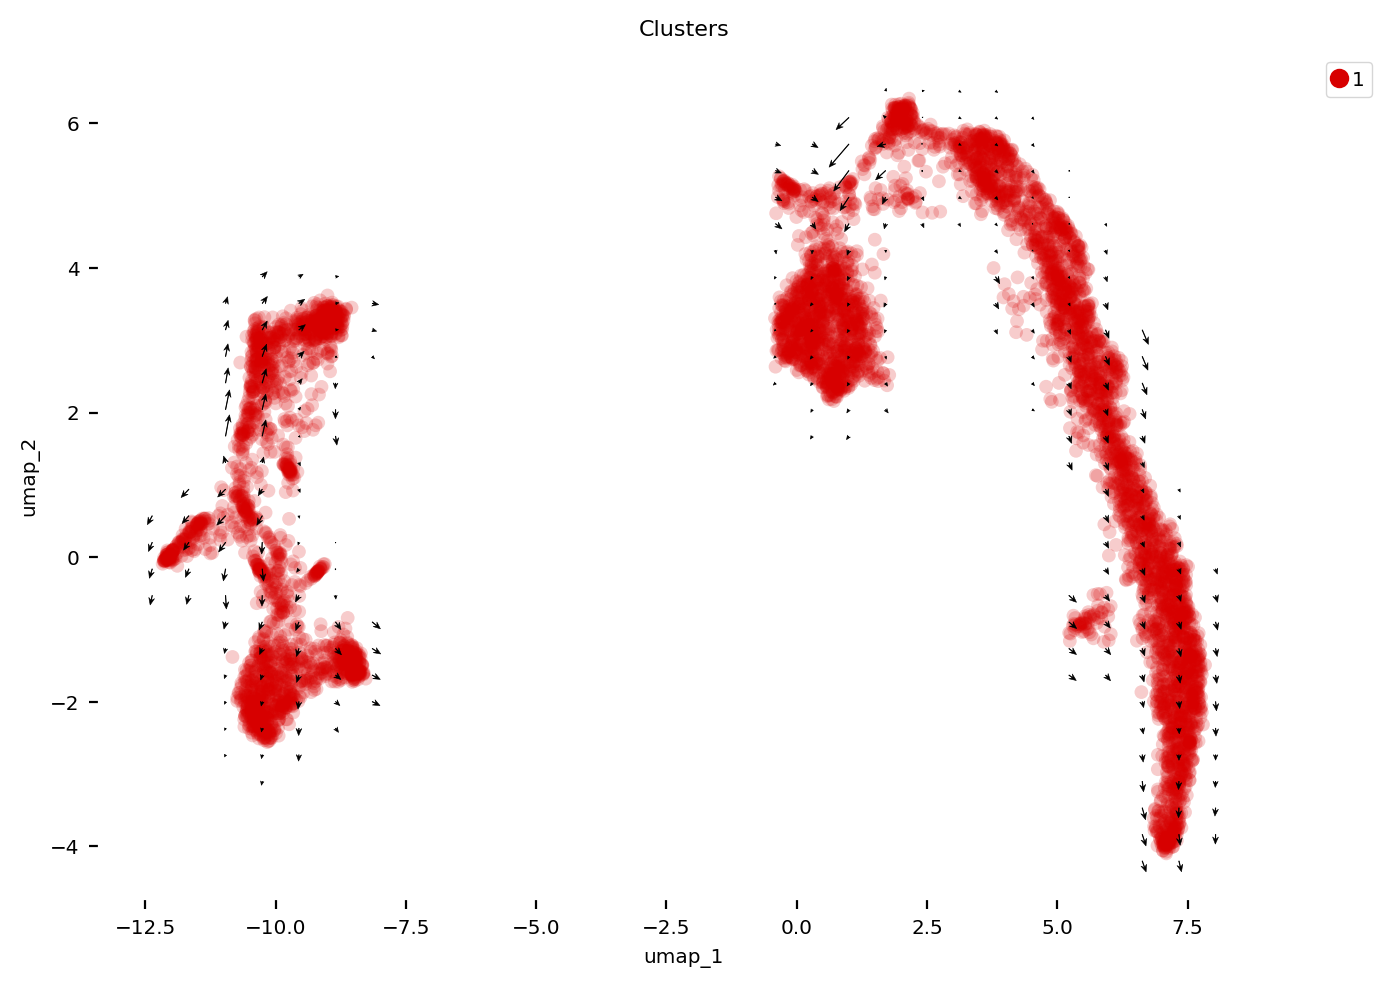

/home/xqiu/.local/lib/python3.6/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


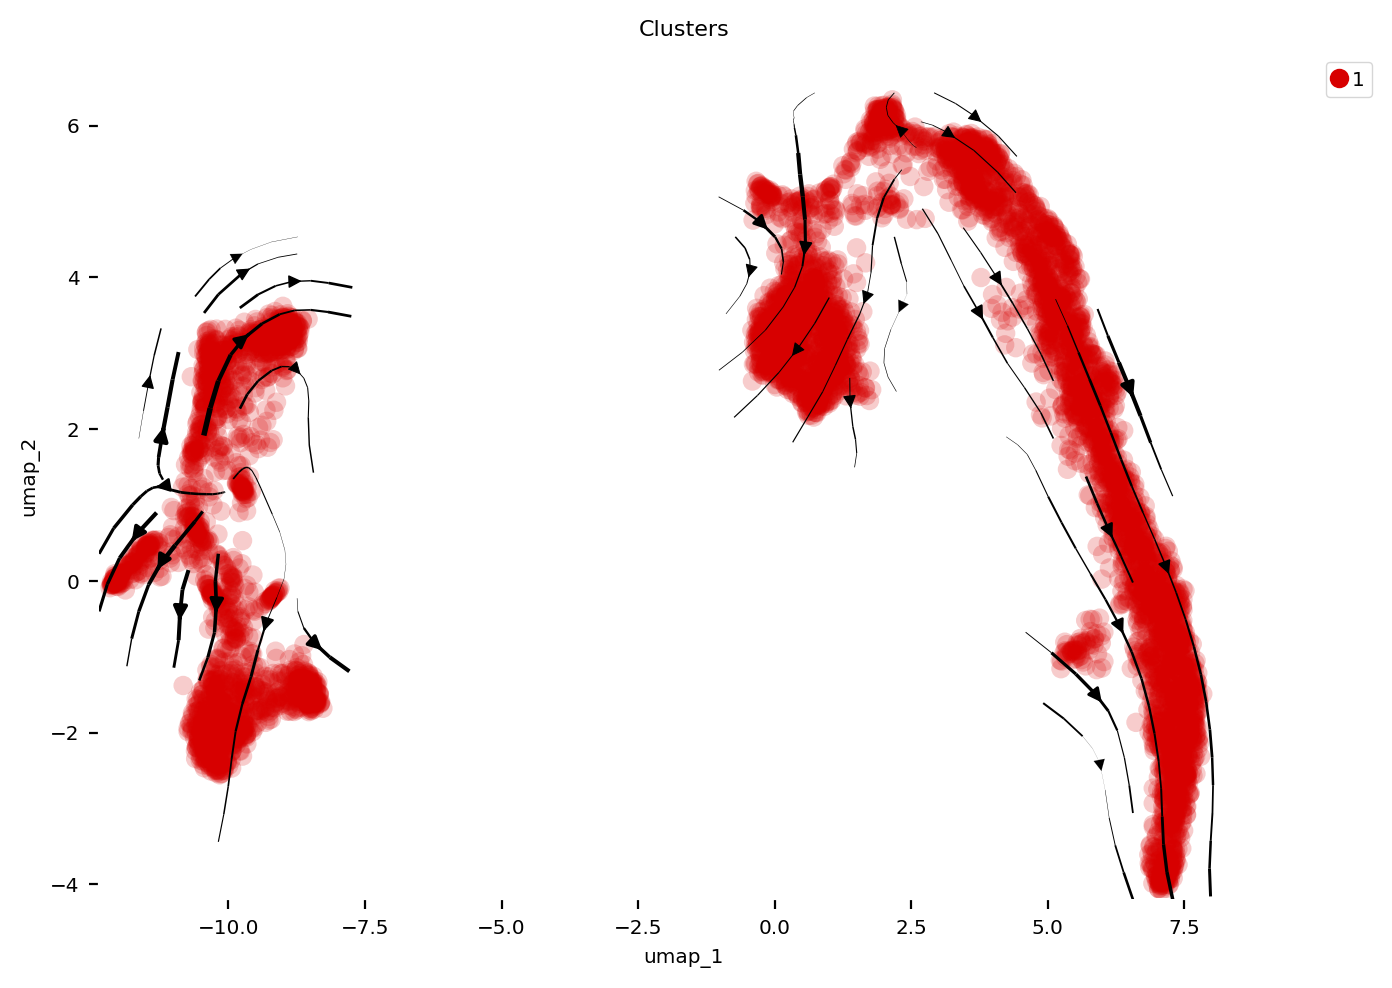

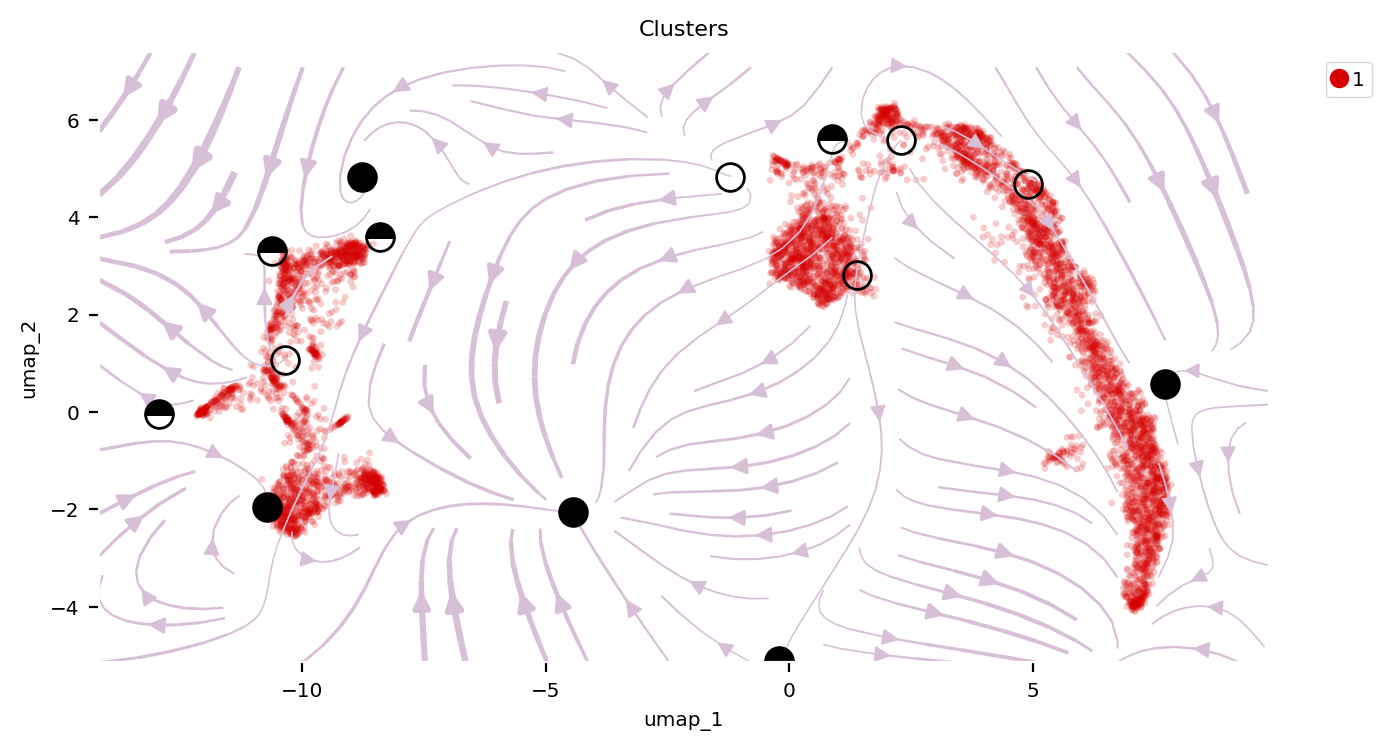

In [20]:
dyn.pl.phase_portraits(adata, genes=gene_list, ncols=3, figsize=(3, 3), basis='umap', show_quiver=False)

dyn.pl.cell_wise_velocity(adata, color=['Clusters'], basis='umap', quiver_size=2, quiver_length=1, figsize=(25, 22)) # ['GRIA3', 'LINC00982', 'AFF2']

dyn.pl.grid_velocity(adata, color=['Clusters'], basis='umap', method='gaussian')

dyn.pl.streamline_plot(adata, color=['Clusters'], basis='umap') 

dyn.pl.topography(adata, color=['Clusters'], basis='umap', ncols=1)

